To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Minimum Cost Network Flow Problem

In this tutorial we will solve minimum cost network flow problems using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 01

A company purchases goods from suppliers and sells goods to customers. Each supplier's production capacity is limited and supply costs are also different. Customer demand quantities and sales returns per good are different. 

| Suppliers nodes   | Costs | Capacities |
| :--: | :-----: | :----------: |
| 2  |  35   | 40         |
| 3  |  40   | 80         |
| 4  |  50   | 100        |

| Customers nodes   | Returns | Demands |
| :--: | :-----: | :----------: |
| 6  |  45   | 100         |
| 7  |  55   | 60         |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    (0, {"color": "blue", "demand": 0}), #-b_0
    (2, {"color": "green", "demand": -40}), #-b_2
    (3, {"color": "green", "demand": -80}), #-b_3
    (4, {"color": "green", "demand": -100}), #-b_4
    (5, {"color": "black", "demand": -160}), #-b_5
    (6, {"color": "red", "demand": 100}), #-b_6
    (7, {"color": "red", "demand": 60}), #-b_7
    (8, {"color": "black", "demand": 220}) #-b_8
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    0:np.array([2.0,3.0]),
    2:np.array([1.0,3.0]),
    3:np.array([1.0,2.0]),
    4:np.array([1.0,1.0]),
    5:np.array([1.0,0.0]),
    6:np.array([3.0,2.5]),
    7:np.array([3.0,1.5]),
    8:np.array([3.0,0.5])
}

{(0, 6): Text(2.3499999999999996, 2.825, '-45'),
 (0, 7): Text(2.3499999999999996, 2.475, '-55'),
 (2, 0): Text(1.35, 3.0, '35'),
 (2, 8): Text(1.6999999999999997, 2.125, '0'),
 (3, 0): Text(1.35, 2.3499999999999996, '40'),
 (3, 8): Text(1.6999999999999997, 1.475, '0'),
 (4, 0): Text(1.35, 1.6999999999999997, '50'),
 (4, 8): Text(1.6999999999999997, 0.825, '0'),
 (5, 6): Text(1.6999999999999997, 0.875, '0'),
 (5, 7): Text(1.6999999999999997, 0.5249999999999999, '0'),
 (5, 8): Text(1.6999999999999997, 0.175, '0')}

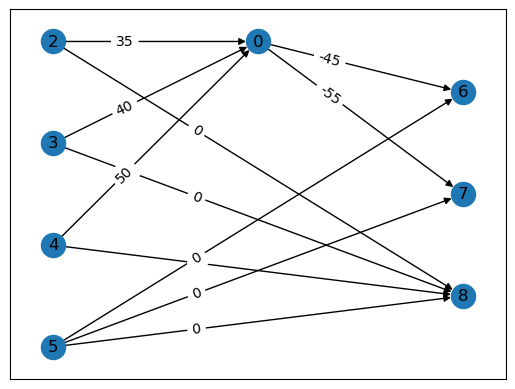

In [5]:
elist = [(2, 0), 
         (3, 0), 
         (4, 0), 
         (2, 8), 
         (3, 8), 
         (4, 8), 
         (0, 6),
         (0, 7),
         (5, 6),
         (5, 7),
         (5, 8)]
G1.add_edges_from(elist)
eattrs = {(2, 0): {"weight": 35, "capacity": 1000}, 
          (3, 0): {"weight": 40, "capacity": 1000}, 
          (4, 0): {"weight": 50, "capacity": 1000}, 
          (2, 8): {"weight": 0, "capacity": 1000}, 
          (3, 8): {"weight": 0, "capacity": 1000}, 
          (4, 8): {"weight": 0, "capacity": 1000},
          (0, 6): {"weight": -45, "capacity": 1000}, 
          (0, 7): {"weight": -55, "capacity": 1000}, 
          (5, 6): {"weight": 0, "capacity": 1000}, 
          (5, 7): {"weight": 0, "capacity": 1000}, 
          (5, 8): {"weight": 0, "capacity": 1000}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.65)
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'capacity'), label_pos = 0.6)

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 8 nodes and 11 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 5)	-45
  (0, 6)	-55
  (1, 0)	35
  (1, 7)	0
  (2, 0)	40
  (2, 7)	0
  (3, 0)	50
  (3, 7)	0
  (4, 5)	0
  (4, 6)	0
  (4, 7)	0


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[  0   0   0   0   0 -45 -55   0]
 [ 35   0   0   0   0   0   0   0]
 [ 40   0   0   0   0   0   0   0]
 [ 50   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [9]:
mincostnetworkflows = nx.min_cost_flow(G1)
print(mincostnetworkflows)

{0: {6: 60, 7: 60}, 2: {0: 40, 8: 0}, 3: {0: 80, 8: 0}, 4: {0: 0, 8: 100}, 5: {6: 40, 7: 0, 8: 120}, 6: {}, 7: {}, 8: {}}


In [10]:
cost = nx.cost_of_flow(G1, mincostnetworkflows, weight='weight')
print(cost)

-1400


We are now expanding the planning horizon to meet demand in the next period. An increase in supply costs is expected. In addition, customer demand is also in an increasing trend. Moreover, it is calculated that 2 units of cost are incurred when transferring the inventory to the next period. Lastly, it is only allowed to miss only 25% of each customer demand in respective periods.  

| Suppliers nodes   | Costs | Capacities |
| :--: | :-----: | :----------: |
| 2.2  |  40   | 40         |
| 3.2  |  45   | 80         |
| 4.2  |  50   | 100        |

| Customers nodes   | Returns | Demands |
| :--: | :-----: | :----------: |
| 6.2  |  45   | 100         |
| 7.2  |  55   | 120         |

In [11]:
G2 = nx.DiGraph()
G2.add_nodes_from([
    (0.1, {"color": "blue", "demand": 0}),
    (2.1, {"color": "green", "demand": -40}),
    (3.1, {"color": "green", "demand": -80}),
    (4.1, {"color": "green", "demand": -100}),
    (5, {"color": "black", "demand": -380}),
    (6.1, {"color": "red", "demand": 100}),
    (7.1, {"color": "red", "demand": 60}),
    (8, {"color": "black", "demand": 440}),
    (0.2, {"color": "blue", "demand": 0}),
    (2.2, {"color": "green", "demand": -40}),
    (3.2, {"color": "green", "demand": -80}),
    (4.2, {"color": "green", "demand": -100}),
    (6.2, {"color": "red", "demand": 100}),
    (7.2, {"color": "red", "demand": 120})
])

We define the positions(as the coordinates "x,y" on a 2D plane) of the nodes as follows:

In [12]:
nodepos = {
    0.1:np.array([3.0,3.0]),
    2.1:np.array([1.0,3.0]),
    3.1:np.array([1.0,2.0]),
    4.1:np.array([1.0,1.0]),
    5:np.array([1.0,0.0]),
    6.1:np.array([5.0,2.5]),
    7.1:np.array([5.0,1.5]),
    8:np.array([5.0,0]),
    0.2:np.array([3.0,-4.0]),
    2.2:np.array([1.0,-2.0]),
    3.2:np.array([1.0,-3.0]),
    4.2:np.array([1.0,-4.0]),
    6.2:np.array([5.0,-2.5]),
    7.2:np.array([5.0,-3.5])
}

{(0.1, 6.1): Text(3.7, 2.825, '-45'),
 (0.1, 7.1): Text(3.7, 2.475, '-55'),
 (0.1, 0.2): Text(3.0, 0.5500000000000003, '2'),
 (2.1, 0.1): Text(1.6999999999999997, 3.0, '35'),
 (2.1, 8): Text(2.4, 1.9500000000000002, '0'),
 (3.1, 0.1): Text(1.6999999999999997, 2.3499999999999996, '40'),
 (3.1, 8): Text(2.4, 1.3, '0'),
 (4.1, 0.1): Text(1.6999999999999997, 1.6999999999999997, '50'),
 (4.1, 8): Text(2.4, 0.65, '0'),
 (5, 8): Text(2.4, 0.0, '0'),
 (5, 6.1): Text(2.4, 0.875, '0'),
 (5, 7.1): Text(2.4, 0.5249999999999999, '0'),
 (5, 6.2): Text(2.4, -0.875, '0'),
 (5, 7.2): Text(2.4, -1.2249999999999999, '0'),
 (0.2, 6.2): Text(3.7, -3.475, '-45'),
 (0.2, 7.2): Text(3.7, -3.825, '-55'),
 (2.2, 0.2): Text(1.6999999999999997, -2.7, '40'),
 (2.2, 8): Text(2.4, -1.3, '0'),
 (3.2, 0.2): Text(1.6999999999999997, -3.35, '45'),
 (3.2, 8): Text(2.4, -1.9500000000000002, '0'),
 (4.2, 0.2): Text(1.6999999999999997, -4.0, '50'),
 (4.2, 8): Text(2.4, -2.6, '0')}

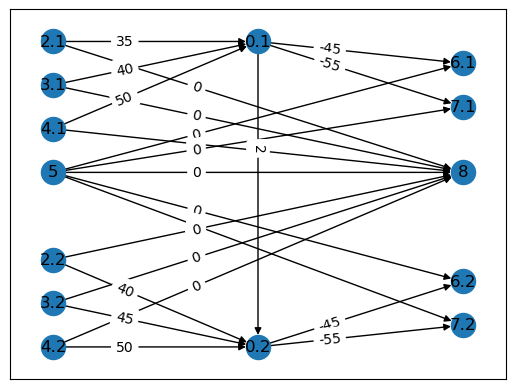

In [13]:
elist = [(2.1, 0.1), 
         (3.1, 0.1), 
         (4.1, 0.1), 
         (2.1, 8), 
         (3.1, 8), 
         (4.1, 8), 
         (5, 8),
         (0.1, 6.1),
         (0.1, 7.1),
         (5, 6.1),
         (5, 7.1), # end of the first period
         (2.2, 0.2), 
         (3.2, 0.2), 
         (4.2, 0.2), 
         (2.2, 8), 
         (3.2, 8), 
         (4.2, 8), 
         (0.2, 6.2),
         (0.2, 7.2),
         (5, 6.2),
         (5, 7.2), # end of the first period
         (0.1, 0.2)]
G2.add_edges_from(elist)
eattrs = {(2.1, 0.1): {"weight": 35, "capacity": 1000}, 
          (3.1, 0.1): {"weight": 40, "capacity": 1000}, 
          (4.1, 0.1): {"weight": 50, "capacity": 1000}, 
          (2.1, 8): {"weight": 0, "capacity": 1000}, 
          (3.1, 8): {"weight": 0, "capacity": 1000}, 
          (4.1, 8): {"weight": 0, "capacity": 1000}, 
          (5, 8): {"weight": 0, "capacity": 1000},
          (0.1, 6.1): {"weight": -45, "capacity": 1000}, 
          (0.1, 7.1): {"weight": -55, "capacity": 1000}, 
          (5, 6.1): {"weight": 0, "capacity": 25}, 
          (5, 7.1): {"weight": 0, "capacity": 15}, # end of the first period
          (2.2, 0.2): {"weight": 40, "capacity": 1000}, 
          (3.2, 0.2): {"weight": 45, "capacity": 1000}, 
          (4.2, 0.2): {"weight": 50, "capacity": 1000}, 
          (2.2, 8): {"weight": 0, "capacity": 1000}, 
          (3.2, 8): {"weight": 0, "capacity": 1000}, 
          (4.2, 8): {"weight": 0, "capacity": 1000}, 
          (0.2, 6.2): {"weight": -45, "capacity": 1000}, 
          (0.2, 7.2): {"weight": -55, "capacity": 1000}, 
          (5, 6.2): {"weight": 0, "capacity": 25}, 
          (5, 7.2): {"weight": 0, "capacity": 30}, # end of the first period 
          (0.1, 0.2): {"weight": 2, "capacity": 1000}}
nx.set_edge_attributes(G2, eattrs)
nx.draw_networkx_nodes(G2, pos = nodepos)
nx.draw_networkx_labels(G2, pos = nodepos)
nx.draw_networkx_edges(G2, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'weight'), label_pos = 0.65)
#nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'capacity'), label_pos = 0.6)

In [14]:
mincostnetworkflows = nx.min_cost_flow(G2)
print(mincostnetworkflows)

{0.1: {6.1: 75, 7.1: 60, 0.2: 0}, 2.1: {0.1: 40, 8: 0}, 3.1: {0.1: 80, 8: 0}, 4.1: {0.1: 15, 8: 85}, 5: {8: 330, 6.1: 25, 7.1: 0, 6.2: 25, 7.2: 0}, 6.1: {}, 7.1: {}, 8: {}, 0.2: {6.2: 75, 7.2: 120}, 2.2: {0.2: 40, 8: 0}, 3.2: {0.2: 80, 8: 0}, 4.2: {0.2: 75, 8: 25}, 6.2: {}, 7.2: {}}


In [15]:
cost = nx.cost_of_flow(G2, mincostnetworkflows, weight='weight')
print(cost)

-2350
